In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

A. An overview of the dataset

1. Import data

In [2]:
df = pd.read_pickle("data_385k.pkl", compression='zip')

2. Check number of rows and columns

In [3]:
df.shape

(385384, 99)

3. Display few entries

In [4]:
df.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Check dtype & create separate lists for each

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

In [6]:
df_float_column = df.select_dtypes(include="float").columns
df_float = df[df_float_column]

df_int_column = df.select_dtypes(include="int").columns
df_int = df[df_int_column]

df_object_column = df.select_dtypes(include="object").columns
df_object = df[df_object_column]

B. Preliminary EDA

1. Duplicates 

In [7]:
df.duplicated().sum()

10500

In [8]:
# remove duplicates

df_dupes = df.duplicated()
df_X = df[~df_dupes]
df_X.shape

(374884, 99)

2. Visualise & summarise missing data

In [9]:
# sort columns by missing values

df_X.isna().sum().sort_values(ascending=False)

sodium_per_portion             374131
fiber_insoluble_per_hundred    371375
fiber_insoluble_unit           371374
manganese_mn_per_hundred       371350
manganese_mn_unit              371347
                                ...  
updated_at                          0
unit                                0
id                                  0
hundred_unit                        0
alcohol_by_volume                   0
Length: 99, dtype: int64

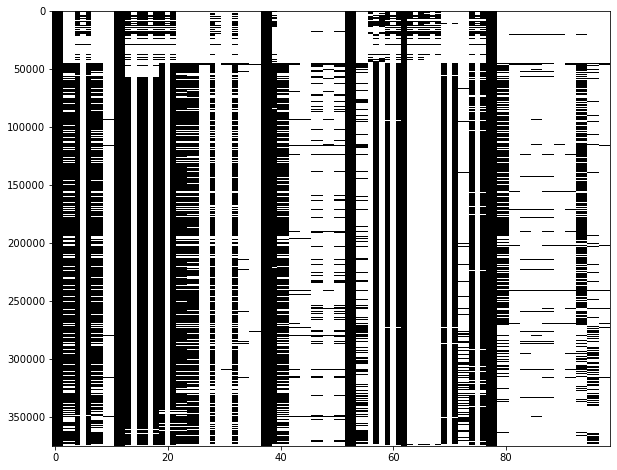

In [10]:
# visualise missing data

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray");

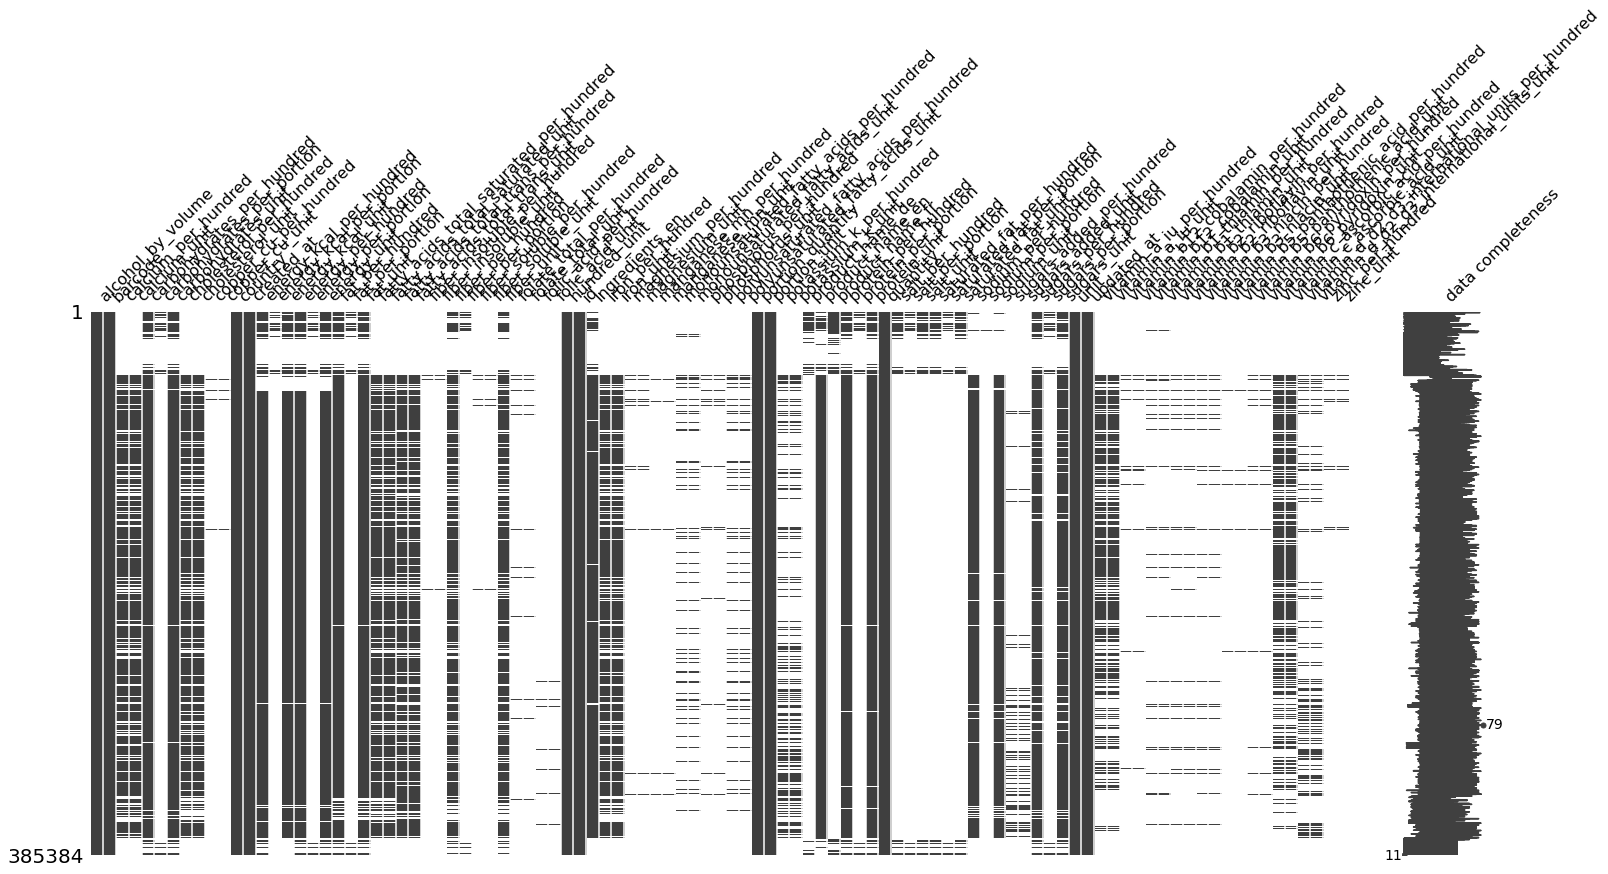

In [11]:
import missingno as msno

msno.matrix(df, labels=True);

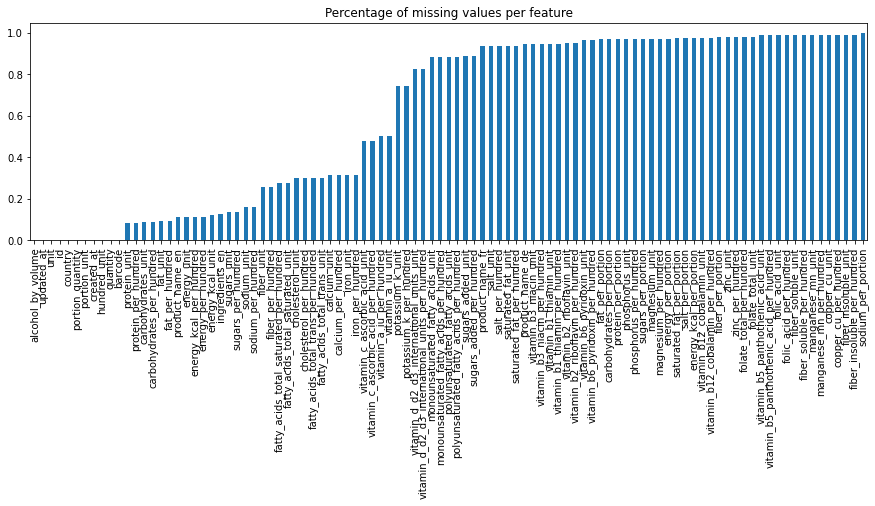

In [12]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

As per visualisations above, many features that are missing nearly all of their values

3. Address missing values

In [13]:
# create new df with features that have at least 50% of results

df_X = df_X.dropna(thresh=df.shape[0] * 0.5, axis=1)
df_X.shape

(374884, 41)

In [14]:
# drop values within new database that have less than 75% of values

df_X = df_X.dropna(thresh=df_X.shape[1] * 0.75, axis=0)
df_X.shape

(282301, 41)

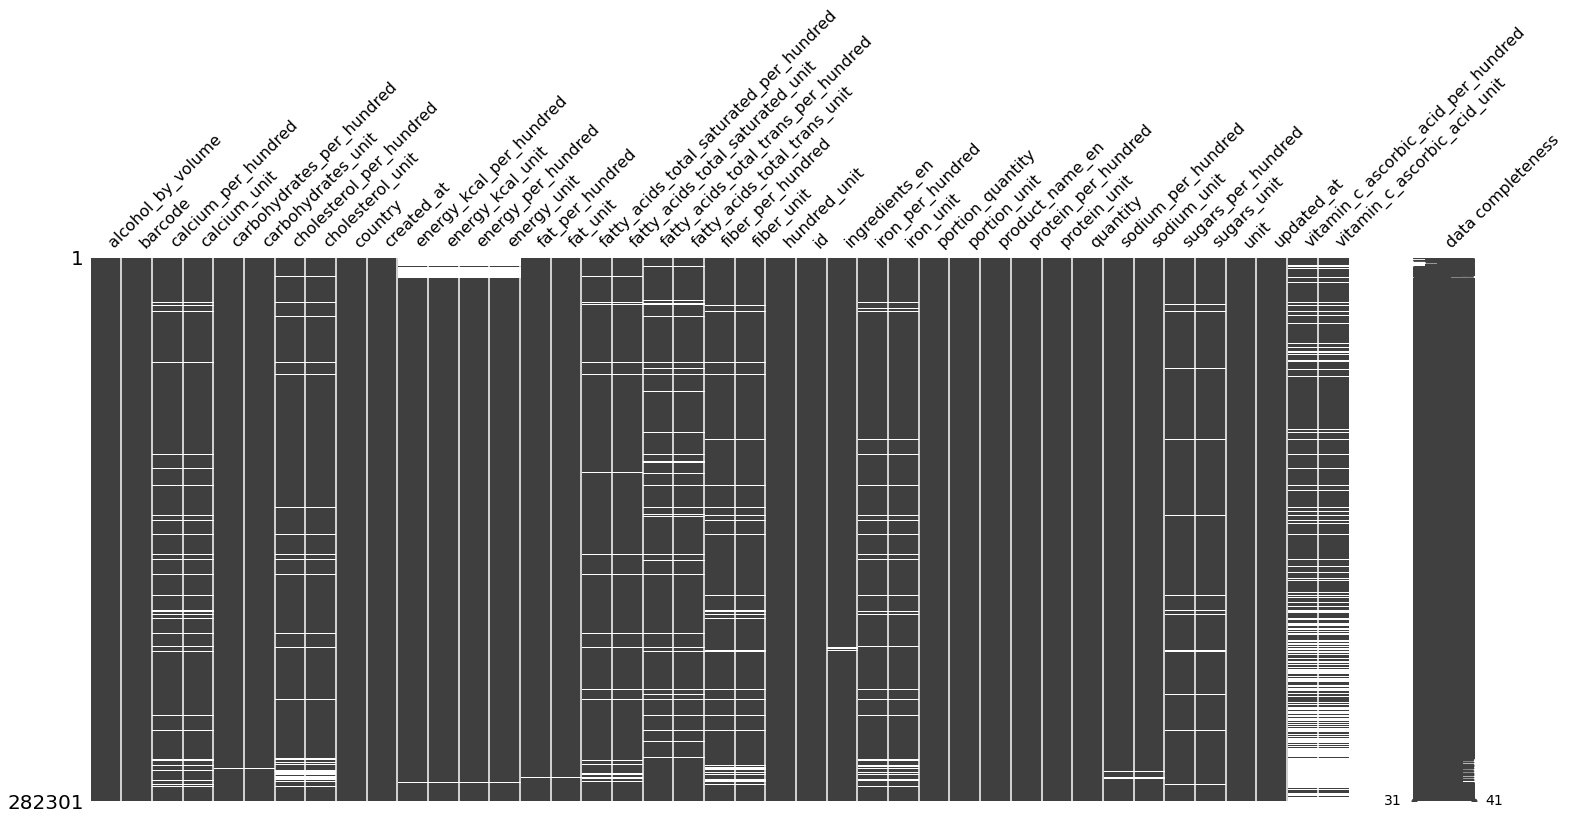

In [15]:
# review completeness of new dataset

import missingno as msno

msno.matrix(df_X, labels=True);

4. Categorical variables

In [16]:
# sum of unique values in each categorical variable

unique_cat_values = df.select_dtypes(include="object").nunique().sort_values()
unique_cat_values

phosphorus_unit                                  1
vitamin_d_d2_d3_international_units_unit         1
polyunsaturated_fatty_acids_unit                 1
potassium_k_unit                                 1
protein_unit                                     1
salt_unit                                        1
saturated_fat_unit                               1
sodium_unit                                      1
sugars_added_unit                                1
sugars_unit                                      1
vitamin_a_iu_unit                                1
vitamin_b12_cobalamin_unit                       1
vitamin_b1_thiamin_unit                          1
vitamin_b2_riboflavin_unit                       1
vitamin_b3_niacin_unit                           1
vitamin_b5_panthothenic_acid_unit                1
vitamin_b6_pyridoxin_unit                        1
vitamin_c_ascorbic_acid_unit                     1
monounsaturated_fatty_acids_unit                 1
manganese_mn_unit              

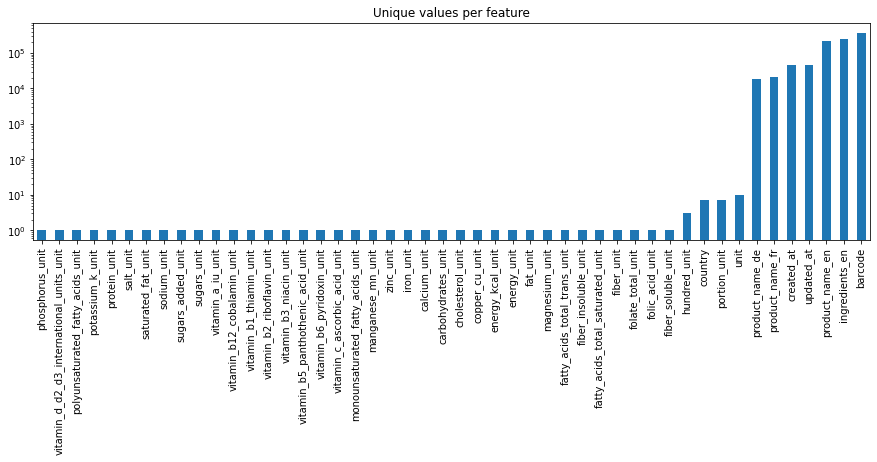

In [17]:
# visualisation of above

unique_cat_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature");

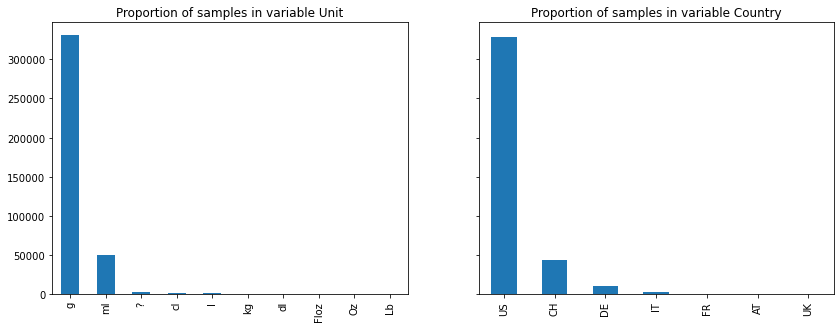

In [18]:
# visualise proportion of samples within variables unit and country

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,5))

df['unit'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Proportion of samples in variable Unit')

df['country'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Proportion of samples in variable Country')

plt.show()

5. Numerical variables

In [19]:
# descriptive stats for numerical variables

df_float.describe().round(2).loc[["count", "mean", "std", "min", "max"]]  

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,carbohydrates_per_portion,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_kcal_per_portion,energy_per_hundred,energy_per_portion,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,385384.00,264979.00,351551.00,11480.00,270282.00,3611.00,341824.00,9967.00,341821.00,10920.00,...,192093.00,9874.00,20527.00,19808.00,21242.00,4666.00,13364.00,200256.0,67024.00,8640.00
mean,0.03,116.99,33.90,19.78,58.98,5.47,272.09,159.08,1137.84,684.18,...,494.24,17.48,0.97,1.74,10.49,14.27,1.48,16.0,14.19,6.53
std,0.80,2557.36,40.72,18.76,1934.72,274.47,257.83,139.15,1077.75,608.42,...,2445.25,402.95,13.46,142.16,73.35,342.92,6.13,583.4,73.26,108.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
max,57.90,684000.00,6400.00,150.50,250000.00,16483.52,39600.00,1508.00,165686.40,5212.00,...,333333.00,33898.31,1111.00,20000.00,6785.71,16920.47,420.00,210000.0,5000.00,10000.00


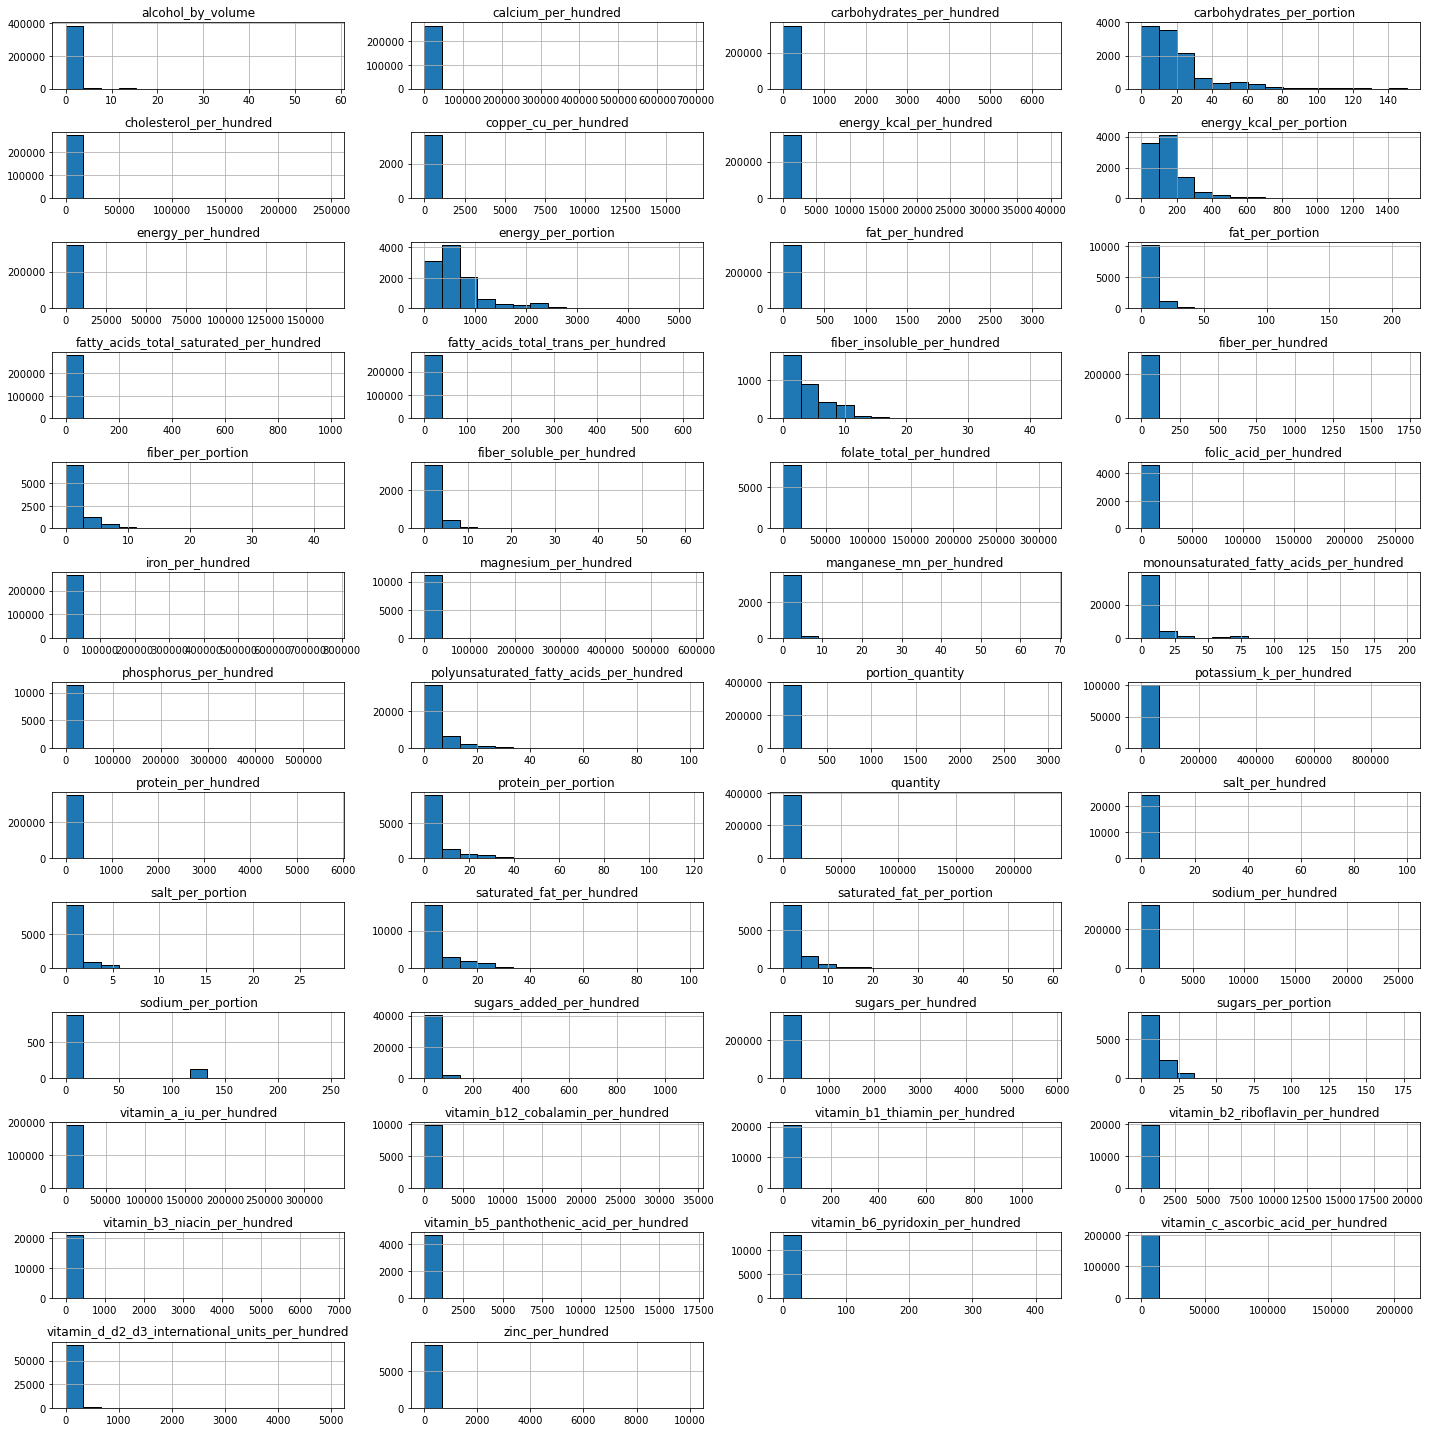

In [20]:
# plot all numerical variables

df_float.hist(bins=15, figsize=(20, 20), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

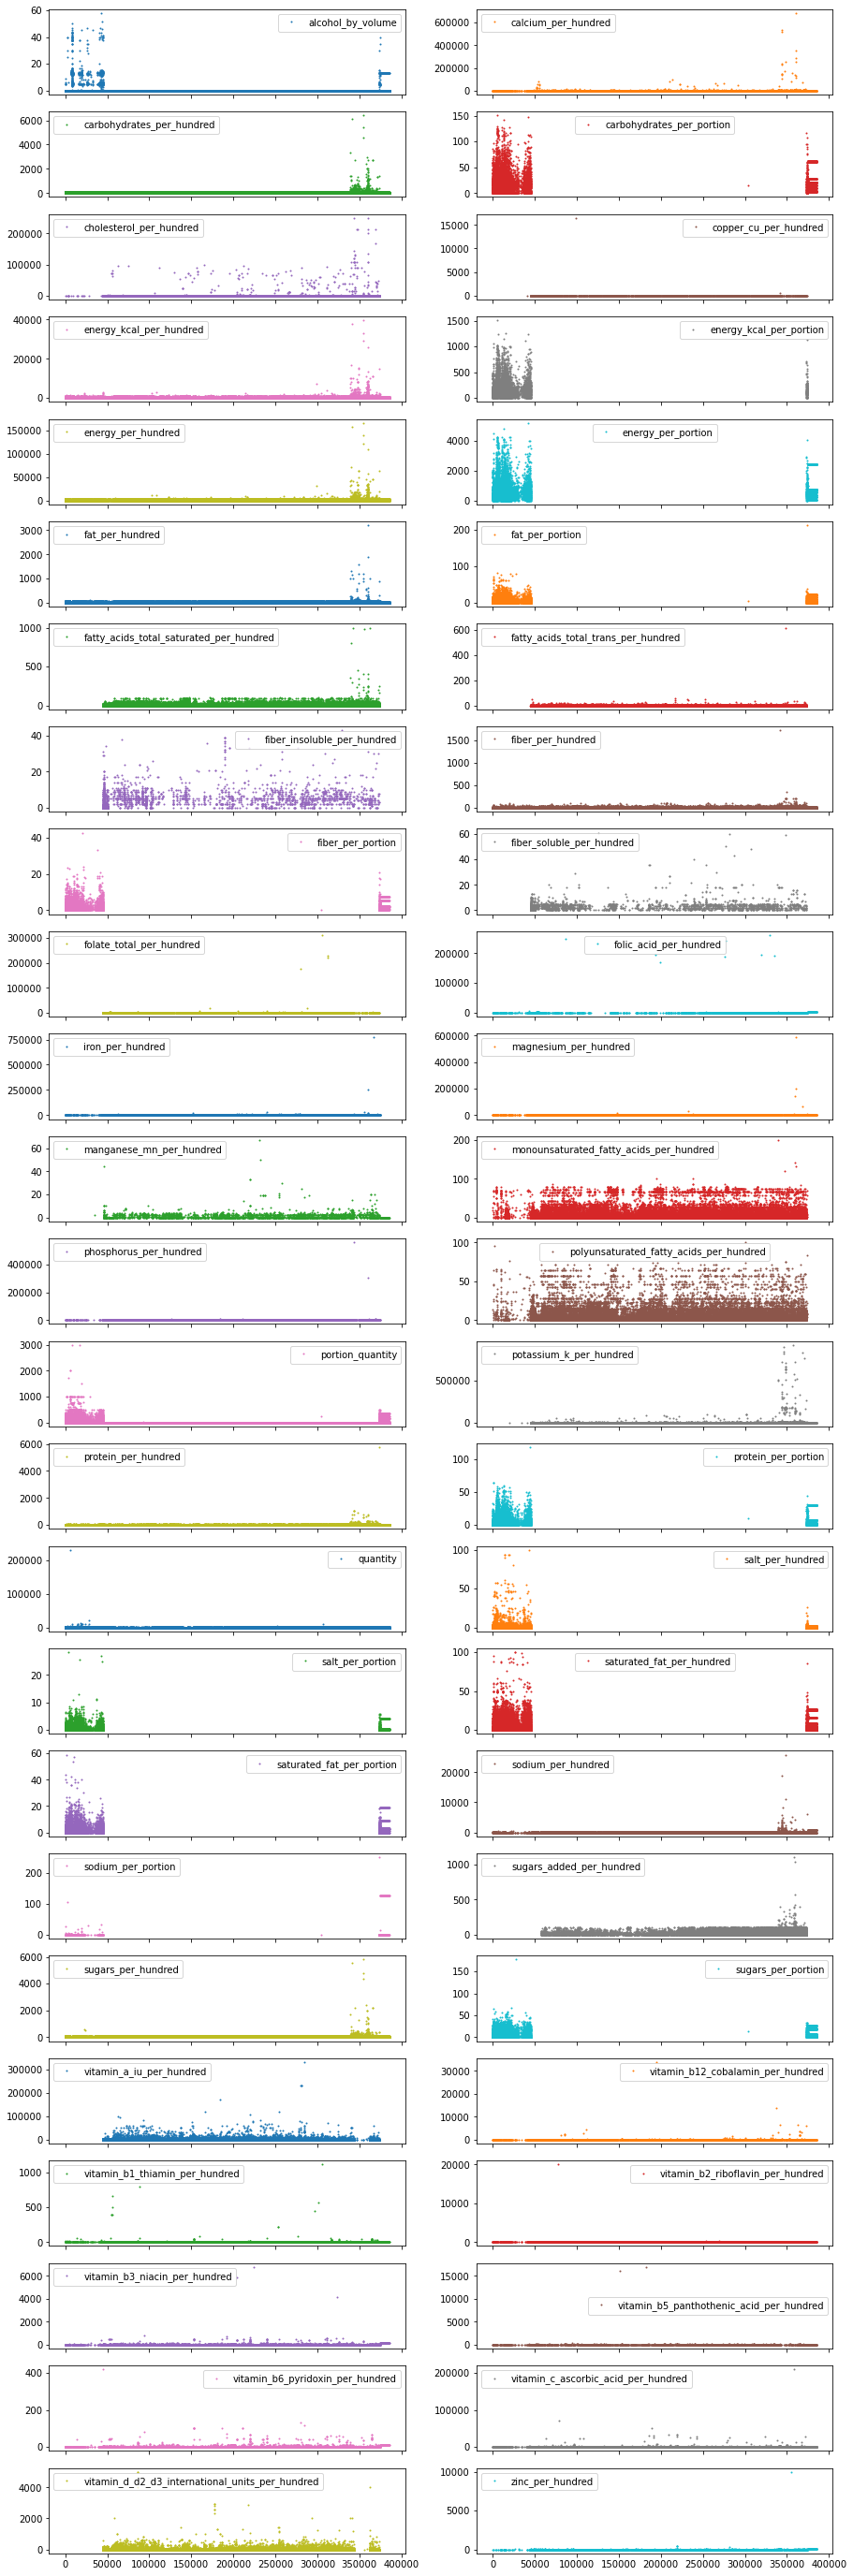

In [21]:
df_float.plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 50), markersize=2);

6. Address unrealistic errors

In [22]:
# create list of all columns ending per_hundred

volume = df_X.filter(regex='per_hundred$', axis=1)
volume_unit = df_X.filter(regex='_unit$', axis=1)

In [23]:
# identify units

print(volume.columns)
volume_unit.tail(5)

Index(['calcium_per_hundred', 'carbohydrates_per_hundred',
       'cholesterol_per_hundred', 'energy_kcal_per_hundred',
       'energy_per_hundred', 'fat_per_hundred',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
       'iron_per_hundred', 'protein_per_hundred', 'sodium_per_hundred',
       'sugars_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred'],
      dtype='object')


,calcium_unit,carbohydrates_unit,cholesterol_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_unit,hundred_unit,iron_unit,portion_unit,protein_unit,sodium_unit,sugars_unit,vitamin_c_ascorbic_acid_unit
373344,mg,g,mg,kCal,kJ,g,g,g,g,g,mg,g,g,g,g,mg
373346,mg,g,mg,kCal,kJ,g,g,g,g,g,mg,g,g,g,g,mg
373648,mg,g,NaN,kCal,kJ,g,NaN,NaN,g,g,mg,g,g,NaN,g,mg
374023,mg,g,NaN,kCal,kJ,g,NaN,NaN,g,g,mg,g,g,NaN,g,mg
374138,mg,g,NaN,NaN,kJ,g,NaN,NaN,g,g,mg,g,g,NaN,g,mg


In [24]:
# filter per hundred columns based on unit

volume_g = volume[['carbohydrates_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
    'protein_per_hundred', 'sodium_per_hundred', 'sugars_per_hundred']]

volume_mg = volume[['calcium_per_hundred', 'cholesterol_per_hundred', 'iron_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred']]

volume_kj = volume[['energy_per_hundred']]

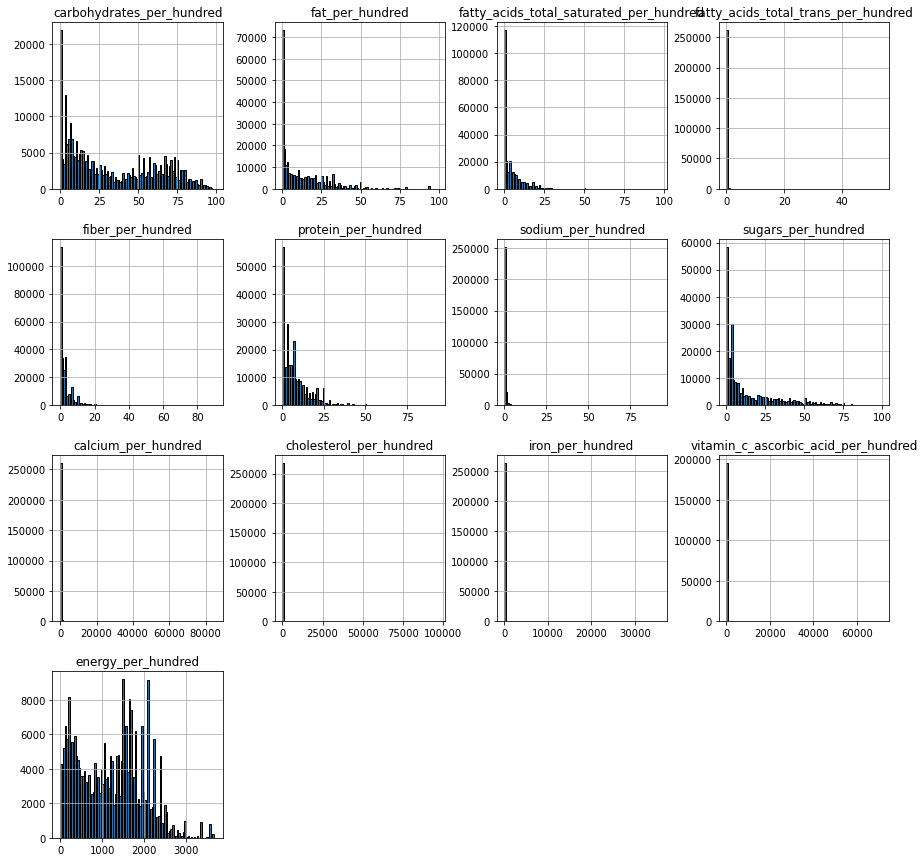

In [25]:
# remove unrealistic values and plot

volume_g = volume_g.where(volume_g < 100)
volume_mg = volume_mg.where(volume_mg < 10 ** 5)
volume_kj = volume_kj.where(volume_kj < 3700)

volume_all = pd.concat([volume_g, volume_mg, volume_kj], axis=1)

volume_all.hist(bins=100, figsize=(15, 15), layout=(-1, 4), edgecolor="black")

plt.show()

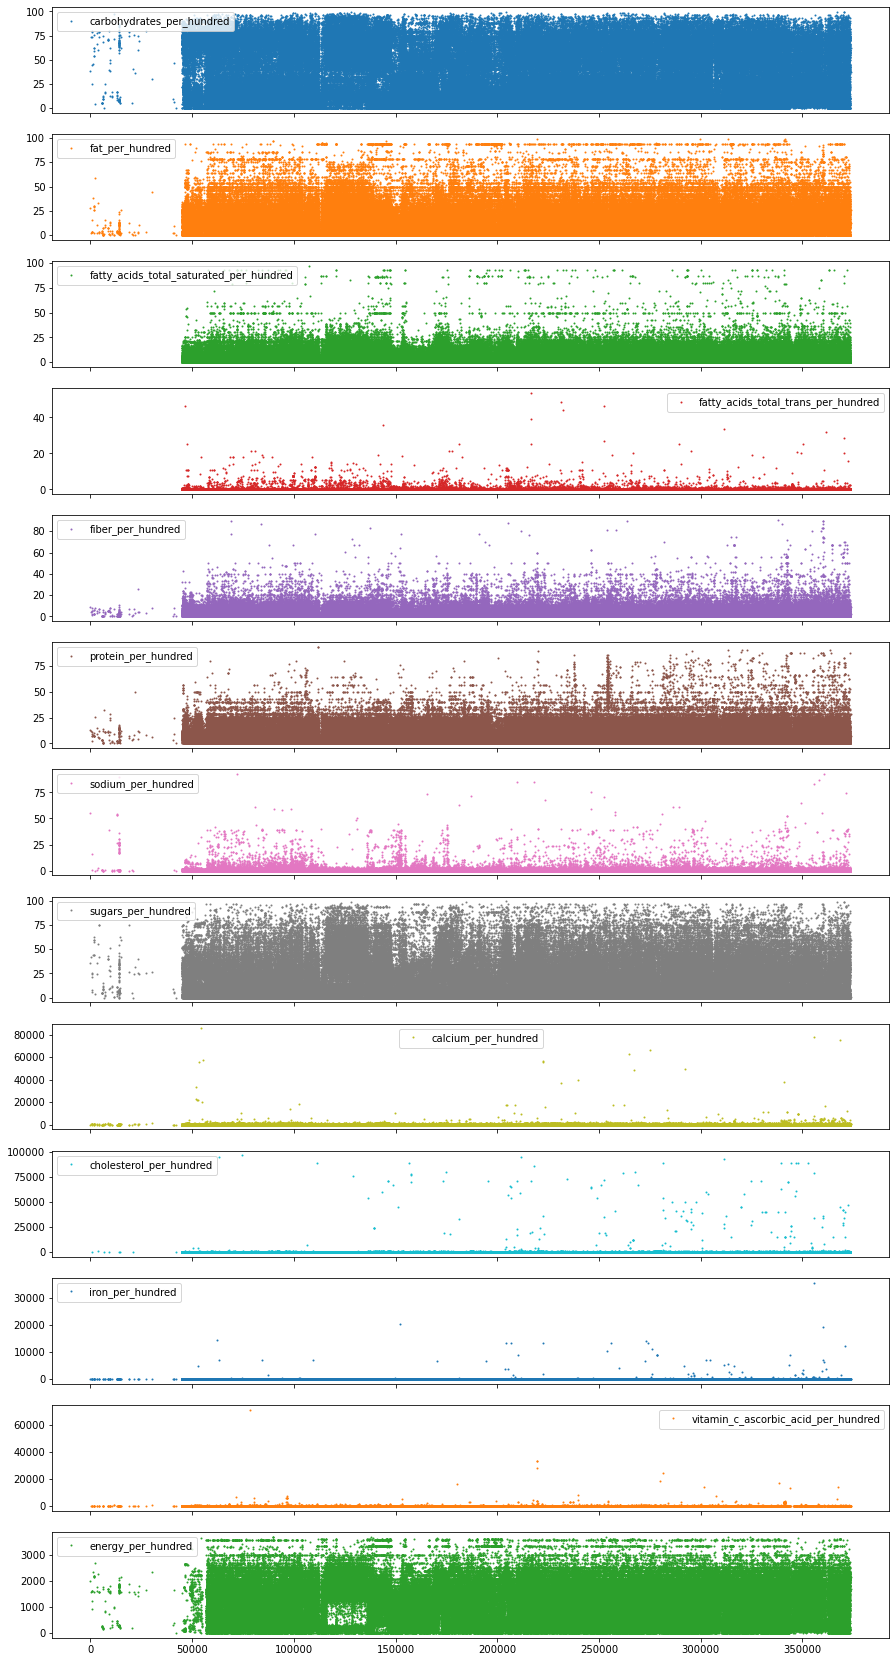

In [26]:
volume_all.plot(
    lw=0, marker=".", subplots=True, figsize=(15, 30), markersize=2);

7. Identify other inconsistencies

Clearly large amount of data missing for first ~50k products. reviewing original dataset it seems certain columns such as salt and protein have data for the first 50k values but not for rest

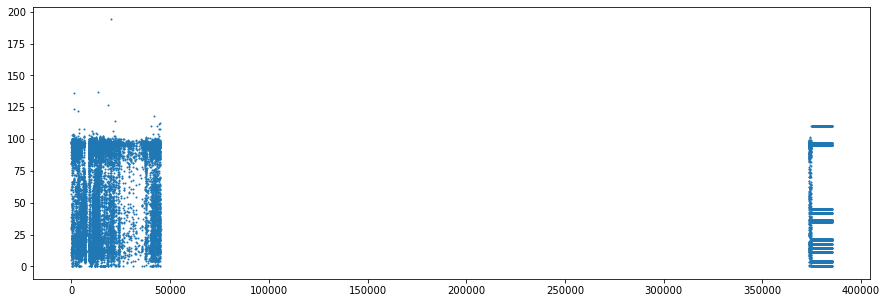

In [27]:
# review summation

df['summation'] = df['protein_per_hundred'] + df['fat_per_hundred'] + df['carbohydrates_per_hundred'] + df['salt_per_hundred'] + df['fiber_per_hundred']
df['summation'].plot(lw=0, marker=".", figsize=(15, 5), markersize=2);

Value of the sum rarely ever exceeds 100g

In [28]:
df['summation'].describe()

count    16641.000000
mean        54.308577
std         34.226198
min          0.000000
25%         21.500000
50%         48.500000
75%         91.750000
max        194.000000
Name: summation, dtype: float64

8. Address outliers

In [29]:
# iron per hundred one extreme outlier to remove ~ 35,000 as shown in below

volume_all['iron_per_hundred'].sort_values(ascending=False)

355779    35714.29
152197    20250.00
360120    19047.62
62287     14285.71
273042    14210.53
            ...   
373331         NaN
373333         NaN
373340         NaN
373341         NaN
373343         NaN
Name: iron_per_hundred, Length: 282301, dtype: float64

In [30]:
mask_iron = volume_all['iron_per_hundred'].gt(35000)
volume_all = volume_all[~mask_iron]

In [31]:
# similarly for vitamin c > 60000

volume_all['vitamin_c_ascorbic_acid_per_hundred'].sort_values(ascending=False)

78513     71428.6
219544    33000.0
219536    33000.0
219537    28285.7
281404    24750.0
           ...   
373333        NaN
373336        NaN
373337        NaN
373340        NaN
373341        NaN
Name: vitamin_c_ascorbic_acid_per_hundred, Length: 282300, dtype: float64

In [32]:
mask_vitc = volume_all['vitamin_c_ascorbic_acid_per_hundred'].gt(70000)
volume_all = volume_all[~mask_vitc]

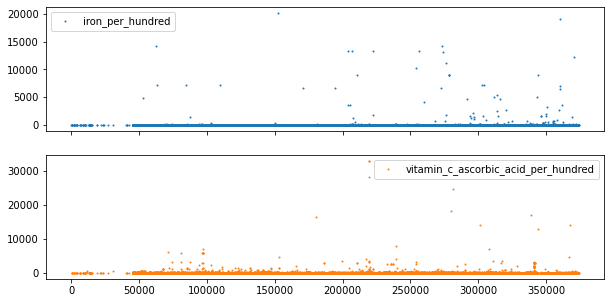

In [33]:
# plot the two variables without extreme values

volume_all[['iron_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred']].plot(
    lw=0, marker=".", subplots=True, figsize=(10, 5), markersize=2);

C. In-Depth EDA

2. Analysis of organic vs non-organic products

In [34]:
# import reg ex and search through product name for any mention of organic bio

# create a new column is_organic with organic or non-organic based on whether any of these values are found

import re

df['is_organic'] = df['product_name_en'].str.contains('organic|bio', flags=re.IGNORECASE).replace(True, 'organic').replace(False, 'non-organic')

In [35]:
# create summary table reviewing size per country of organic/non-organic

summary = df.groupby(['country', 'is_organic']).size()
summary = summary.reset_index()

# rename column names

summary.rename(columns={0: 'count'}, inplace=True)

# add new total & % columns 

summary['total'] = summary.groupby('country')['count'].transform('sum')
summary['%'] = (summary['count']/summary['total']).round(2)
summary

,country,is_organic,count,total,%
0,CH,non-organic,12948,13783,0.94
1,CH,organic,835,13783,0.06
2,DE,non-organic,556,620,0.90
3,DE,organic,64,620,0.10
4,FR,non-organic,23,24,0.96
5,FR,organic,1,24,0.04
6,IT,non-organic,126,131,0.96
7,IT,organic,5,131,0.04
8,US,non-organic,311090,328286,0.95
9,US,organic,17196,328286,0.05


Small sample set but Germany has much higher proportion of organic products

In [36]:
# compare country distribution across selected nutrients

nutrients = df[['country', 'is_organic', 'carbohydrates_per_hundred', 'fat_per_hundred', 'fiber_per_hundred', 'protein_per_hundred', 
    'sodium_per_hundred', 'sugars_per_hundred']]

# remove abnomalies > 100g

nutrients_num = nutrients.select_dtypes(include='number')
nutrients_num = nutrients_num.where(nutrients_num < 100)

# add values back to original dataframe

nutrients = nutrients[['country', 'is_organic']]
nutrients[nutrients_num.columns] = nutrients_num

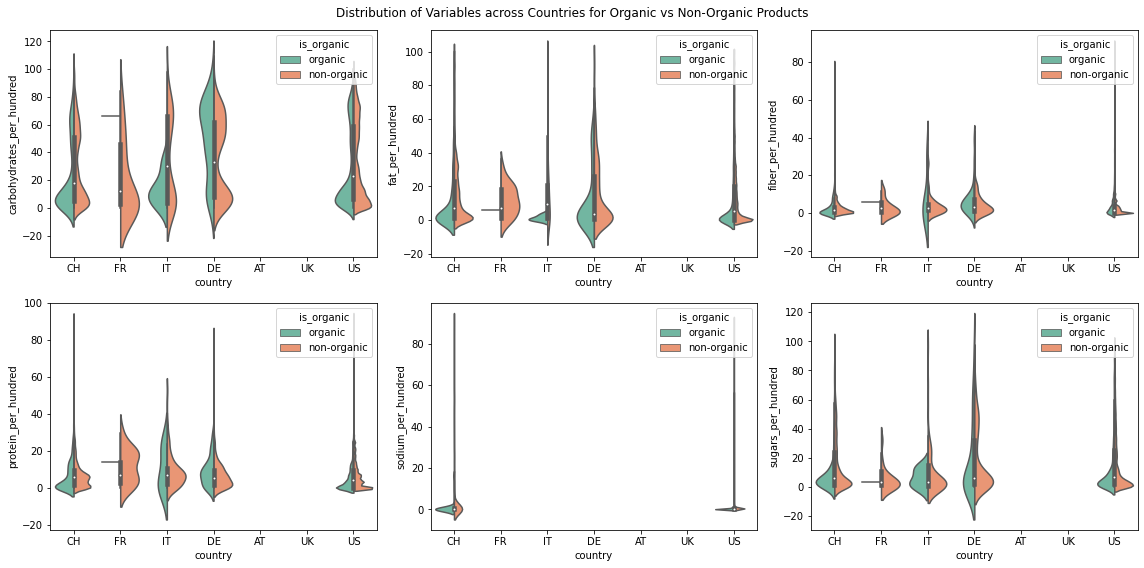

In [80]:
# plot dsitributions of chosen variables

nutrient_list = ['carbohydrates_per_hundred', 'fat_per_hundred', 'fiber_per_hundred', 'protein_per_hundred', 
    'sodium_per_hundred', 'sugars_per_hundred']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

for col, ax in zip(nutrient_list, axes.ravel()):
    fig.suptitle('Distribution of Variables across Countries for Organic vs Non-Organic Products')
    sns.violinplot(
        data=nutrients,
        x='country',
        y=col,
        ax=ax,
        palette="Set2",
        split=True,
        hue='is_organic',
    )
plt.tight_layout()

US has a more even distribution profile across organic & non organic products whereas in all other countries the variation is higher across the two

C3. Additives in food products

In [38]:
# start by creating a new list of all enumbers inclusive in the ingredients

df['e_numbers'] = df['ingredients_en'].str.findall(r'[e]+[\d]+|[e] +[\d]+', flags=re.IGNORECASE) + df['ingredients_en'].str.findall(r'[e]+[\d]+[a-z]+', flags=re.IGNORECASE)

# filter out all the empty results and create a single array with lists of all e numbers

enumbers = [i for i in df['e_numbers'].dropna() if i]

# build new list with all single entries

enumbers = [item for sublist in enumbers for item in sublist]

# create dataframe from the array

enumbers = pd.DataFrame(enumbers)

In [39]:
# clean results

enumbers[0] = enumbers[0].str.replace(" ", "")
enumbers[0] = enumbers[0].str.replace("e", "E")

In [40]:
# top 10 most common additives in Open Food database are therefore:

enumbers.value_counts().head(10)

E1      18643
E60      7017
E80      5709
E2       5004
E471      696
E330      560
E500      430
E450      367
E331      343
E442      321
dtype: int64

In [41]:
# import risky additives file

additives = pd.read_csv("risky_additives.csv") 

In [42]:
# view potential risk labels

additives['Risk'].unique()

array([nan, 'High risk of over exposure',
       'No or very low risk of over exposure',
       'Moderate risk of over exposure'], dtype=object)

In [43]:
# label high risk category and display entries to view format

high_risk = additives[additives['Risk']=='High risk of over exposure']
high_risk.head(2)

,Additive,Risk
8,E202 - Potassium sorbate,High risk of over exposure
9,E450 - Diphosphates,High risk of over exposure


In [44]:
# split column to see only enumber

high_risk = high_risk.Additive.str.split(" - ", expand=True)

high_risk = high_risk.rename(columns={0: "enumber", 1:'long name'})

In [45]:
# create a list of all entries

high_risk_e = high_risk['enumber'].to_list()

# format into findall format 

high_risk_e_list = ('|'.join(high_risk_e))

In [46]:
# now we have list of risky additives need a dataframe in format to find each

country_e = df[['country', 'e_numbers']].dropna()
country_e['e_numbers'] = country_e['e_numbers'].astype(str)
country_e['e_numbers'] = country_e['e_numbers'].str.replace(" ", "")
country_e['e_numbers'] = country_e['e_numbers'].str.replace("e", "E")


In [47]:
# add new column with all the values found

country_e['high_risk'] = country_e['e_numbers'].str.findall(high_risk_e_list)

# add new column with count of high risk addtiives

country_e['high_risk_count'] = country_e['high_risk'].apply(lambda x: len(x))

In [48]:
# gruop by country and sum total risky additives

country_e.groupby('country').sum()

,high_risk_count
country,
CH,1571
DE,13
FR,0
IT,8
US,426


Clear that CH has an inproportionate amount 

C. 4 Allergens

(using as additional practice)

In [49]:
# list out all potential allergens

allergens = ('celery|barley|oats|prawns|crabs|lobsters|eggs|fish|lupin|milk|mussels|oysters|mustard|peanuts|sesame|soybeans|almonds|hazelnuts|walnuts|brazil nuts|cashews|pecans|pistachios|macademia nuts')

# search ingredients colums for all

df['allergens'] = df['ingredients_en'].str.findall(allergens,
    flags=re.IGNORECASE
)

In [50]:
# create a new list of all allergen findings removing blank results

allergen_list = [i for i in df['allergens'].dropna() if i]

# build a new single list of all these entries 

allergen_list = [item for sublist in allergen_list for item in sublist]

In [51]:
# create new df for resulting list 

allergen_total = pd.DataFrame(allergen_list)

# format column to ensure consistent count

allergen_total = allergen_total[0].str.lower()

# sum total to see most common allergens

allergen_total.value_counts()

milk           209748
barley          25839
eggs            19733
almonds         15922
peanuts         14783
mustard         14200
celery          13997
sesame          11822
oats            10678
soybeans         8730
cashews          6132
pecans           4426
walnuts          2878
hazelnuts        2760
fish             2254
pistachios       1033
brazil nuts       612
mussels           110
lupin              98
oysters            67
crabs              48
prawns             10
Name: 0, dtype: int64

D. Text Data

In [52]:
# Define preprocess_text function to format the ingredients list

def preprocess_text(text):
    
    # Convert to lowercase
    clean_text = text.lower()
    
    # Replace common punctuation marks with whitespace
    clean_text = re.sub(r"[,.*()]"," ", clean_text)
    
    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s"," ", clean_text)
    
    # create new list of entries with clean data
    clean_text_list = [i for i in clean_text.split()]
    
    return clean_text_list

In [53]:
# apply preprocess function to entire ingredients column

df['clean_ingredients'] = df['ingredients_en'].astype(str).apply(lambda x: preprocess_text(x))

# combine into one full list to use Counter later on

ingredient_list = [item for sublist in df['clean_ingredients'] for item in sublist]

In [54]:
# create new column to count quantity of individual ingredients

df['ingredients_length'] = df['clean_ingredients'].apply(lambda x: len(x))

In [55]:
# display products with the longest ingredients list

df[['product_name_en', 'clean_ingredients', 'ingredients_length']].sort_values('ingredients_length', ascending=False).head(5)

,product_name_en,clean_ingredients,ingredients_length
51629,Gamesa Lonchera Assorted Cookies 14.3 Ounce 5 ...,"[arcoiris:, enriched, flour, wheat, flour, nia...",536
275300,BROWNIE TRIO,"[classic, fudge:, brownie, mix, sugar, enriche...",485
350670,"VANILLA AND RASPBERRY, RED VELVET, CARROT, CHO...","[water, powdered, sugar, sugar, corn, starch, ...",479
241595,"HUNGRY-MAN, SMOKIN' BACKYARD BARBEQUE","[mashed, potatoes, water, dehydrated, potato, ...",475
265719,ASSORTED COOKIES,"[roscayema:, wheat, flour, sugar, vegetable, f...",458


In [56]:
# create new list to remove NaN values and view products with shortest ingredients length

ingredient_x = df[['product_name_en', 'clean_ingredients', 'ingredients_length']].dropna()

ingredient_x.sort_values('ingredients_length').head(5)

,product_name_en,clean_ingredients,ingredients_length
385379,Nutriathletic - Whey (Swiss chocolate flavour),[nan],1
71671,"KEY FOOD, BROCCOLI FLORETS",[broccoli],1
71670,"BIRDS EYE, SWEET KERNEL CORN",[corn],1
71666,"KEY FOOD, CHOPPED BROCCOLI",[broccoli],1
71664,"KEY FOOD, CAULIFLOWER FLORETS",[cauliflower],1


In [57]:
from collections import Counter

# display most frequent ingredients

top_ingredients = Counter(ingredient_list).most_common(20)
top_ingredients

[('salt', 355679),
 ('sugar', 257982),
 ('oil', 254030),
 ('acid', 239314),
 ('water', 212305),
 ('flour', 200777),
 ('and', 197244),
 ('corn', 184082),
 ('milk', 182479),
 ('natural', 180522),
 ('organic', 168648),
 ('sodium', 159845),
 ('wheat', 143495),
 ('flavor', 131834),
 ('powder', 117567),
 ('syrup', 113942),
 ('gum', 108872),
 ('soy', 107743),
 ('starch', 104225),
 ('citric', 97450)]

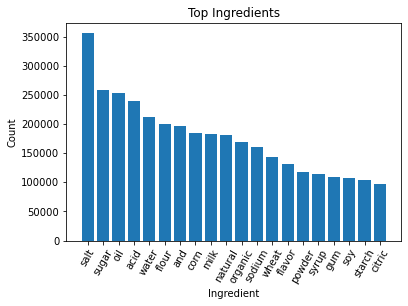

In [58]:
top_ingredients = pd.DataFrame(top_ingredients, columns=['ingredient', 'count'])
top_ingredients

plt.bar(top_ingredients['ingredient'], top_ingredients['count'])
plt.title('Top Ingredients')
plt.xlabel('Ingredient')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.show()

E. Time-Series

In [59]:
# convert created time column into a time series and set as index

df['created'] = pd.to_datetime(df['created_at'])
df.index = df['created']

In [60]:
# create two new columnsfor the hour and month of creation from index 

df['hour'] = df.index.hour
df['month'] = df.index.month

In [61]:
# create new df focusing on just the new month & hour columns counting totel products within each

month_hour = df.groupby(['month', 'hour']).count()

# trim df to only focus on the created count

month_hour = month_hour['created']

In [62]:
# reset index, build pivot table from the data and fill all nan values with 0

month_hour = month_hour.reset_index()

month_hour = month_hour.pivot(index='month', columns='hour', values='created')

month_hour = month_hour.fillna(0)

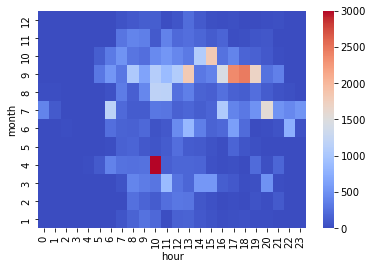

In [63]:
# plot heatmap from new table 

sns.heatmap(month_hour, cmap='coolwarm', vmax=3000).invert_yaxis()

In [64]:
# create new column in year month format

df['year_month'] = df['created'].dt.strftime('%Y/%m')

In [65]:
# create new df focusing on new column and country

creation_year = df[['year_month', 'country']].reset_index()

# once again count values

creation_year = creation_year.groupby(['year_month', 'country']).count()
creation_year = creation_year.reset_index()

# create pivot from latest 

creation_year = creation_year.pivot(index='year_month', columns='country', values='created').fillna(0)

creation_year

country,AT,CH,DE,FR,IT,UK,US
year_month,,,,,,,
2016/05,0.0,20.0,0.0,0.0,0.0,0.0,0.0
2016/06,0.0,1082.0,0.0,0.0,0.0,0.0,0.0
2016/07,0.0,7395.0,0.0,0.0,0.0,0.0,0.0
2016/08,0.0,291.0,0.0,0.0,0.0,0.0,0.0
2016/09,0.0,5382.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2021/06,0.0,247.0,0.0,2.0,0.0,0.0,25.0
2021/07,0.0,262.0,0.0,0.0,0.0,0.0,0.0
2021/08,0.0,217.0,0.0,0.0,0.0,0.0,3.0


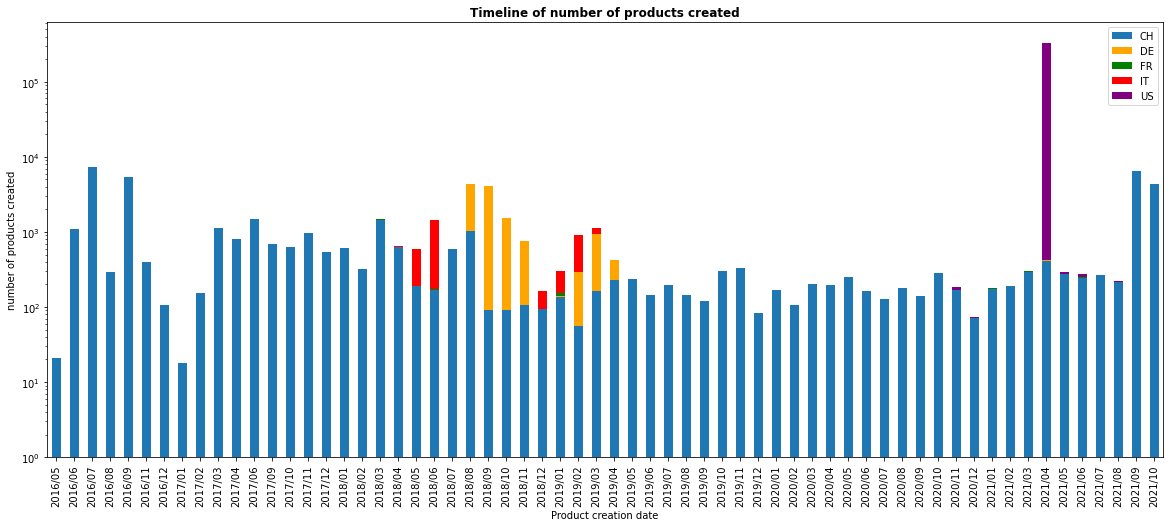

In [66]:
# build stacked bar chart for the above

CH = creation_year['CH']
DE = creation_year['DE']
FR = creation_year['FR']
IT = creation_year['IT']
US = creation_year['US']

plt.figure(figsize=(20, 8))

CH.plot.bar(log=True)
DE.plot.bar(bottom=CH, color='orange')
FR.plot.bar(bottom=CH + DE, color='green')
IT.plot.bar(bottom=CH + DE + FR, color='red')
US.plot.bar(bottom=CH + DE + FR + IT, color='purple')


plt.legend()
plt.title('Timeline of number of products created', fontweight='bold')
plt.xlabel('Product creation date')
plt.ylabel('number of products created')
plt.xticks(rotation=90)

plt.show()

F. Correlation Analysis

In [67]:
# build correlation matrix 

df_corr = volume_all.corr(method="pearson")
df_corr.round(3)

# review results for energy per hundred 

energy_corr = df_corr.loc['energy_per_hundred']
energy_corr.sort_values()

sodium_per_hundred                        -0.030878
vitamin_c_ascorbic_acid_per_hundred       -0.023746
cholesterol_per_hundred                    0.005911
iron_per_hundred                           0.009157
fatty_acids_total_trans_per_hundred        0.047762
calcium_per_hundred                        0.055248
protein_per_hundred                        0.291516
fiber_per_hundred                          0.304537
sugars_per_hundred                         0.344759
carbohydrates_per_hundred                  0.526031
fatty_acids_total_saturated_per_hundred    0.560318
fat_per_hundred                            0.776534
energy_per_hundred                         1.000000
Name: energy_per_hundred, dtype: float64

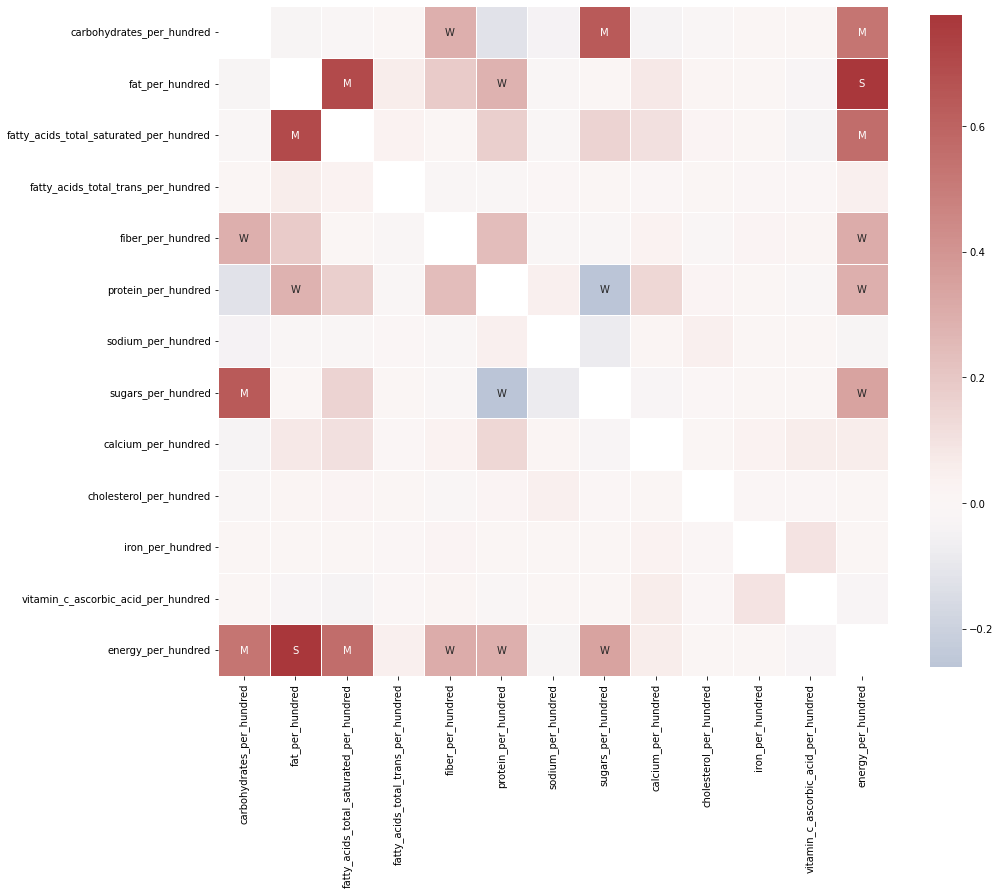

In [68]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75,'S',
                  np.where(np.abs(df_corr)>0.5,'M',
                           np.where(np.abs(df_corr)>0.25,'W','')))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

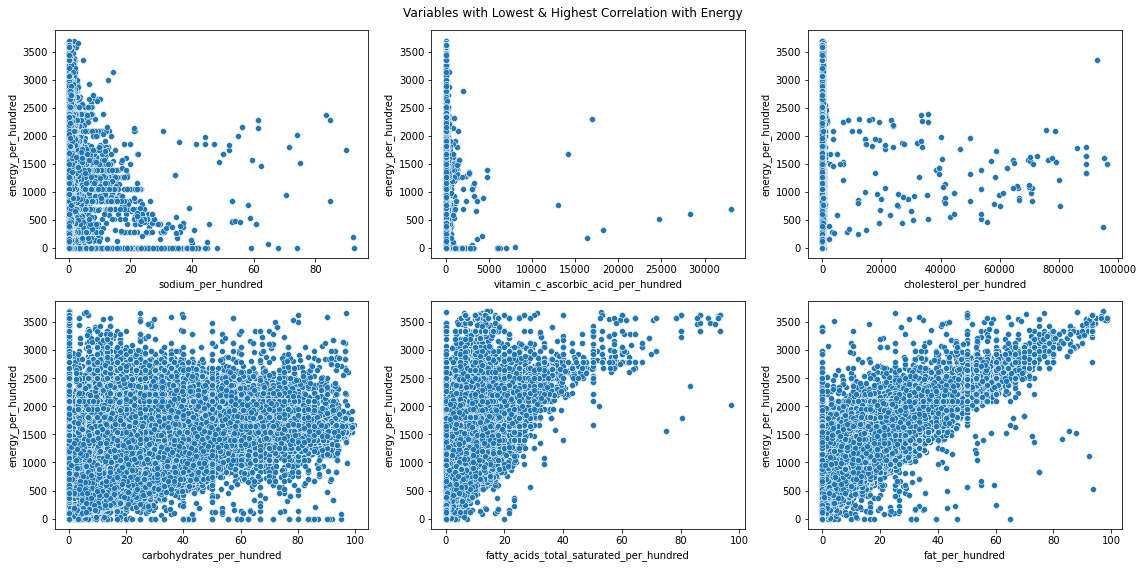

In [81]:
# plot top and bottom correlation variables

top_bottom_corr = ['sodium_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred', 'cholesterol_per_hundred', 'carbohydrates_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fat_per_hundred']

fig, axes = plt.subplots(2, 3, figsize=(16,8))

for col, ax in zip(top_bottom_corr, axes.ravel()):
    fig.suptitle('Variables with Lowest & Highest Correlation with Energy')
    sns.scatterplot(
        data=volume_all,
        x=col,
        y='energy_per_hundred',
        ax=ax,
    )

plt.tight_layout()

Lowest correlated appear to still have extreme outliers that may be skewing the correlation returns.

Fatty acids and fat appear to have a linear relationship which makes sense. Carbohydrates looks to be random correlation but can recognise in general energy levels tend to be higher as carbohydrate level increases. 


In [70]:
# focusing on energy & country variables create new df dropping all na values

energy_country = df[['country', 'energy_per_hundred']]
energy_country = energy_country.dropna()


In [71]:
# review details of energy levels to decide on low, medium & high levels

energy_country.describe()

,energy_per_hundred
count,341821.000000
mean,1137.840335
std,1077.750446
min,0.000000
25%,372.380000
50%,1117.130000
75%,1673.600000
max,165686.400000


In [72]:
# define a new function to label

def f(x):
    if x < 499:
            return 'Low'
    elif 500 < x < 1500:
            return 'Medium'     
    else:
            return 'High'
        
# create new column applying this function        

energy_country['energy_level'] = energy_country['energy_per_hundred'].apply(lambda x: f(x))

In [73]:
# create new df with only two columns of interest

energy_country = energy_country[['country', 'energy_level']].reset_index(drop=True)

# create country specific sets (reviewing only top 3 due to sample sizes)

swiss = energy_country[energy_country['country'] == 'CH']
usa = energy_country[energy_country['country'] == 'US']
germany = energy_country[energy_country['country'] == 'DE']

In [74]:
# create new count tables

data_count = pd.crosstab(index=energy_country['energy_level'], columns="count")
swiss_count = pd.crosstab(index=swiss['energy_level'], columns="count")
usa_count = pd.crosstab(index=usa['energy_level'], columns="count")
germany_count = pd.crosstab(index=germany['energy_level'], columns="count")

Testing the null hypothesis that each country has same distribution as entire dataset

In [75]:
# starting with swiss data calculate expected count and chi-square

expected_count_swiss = data_count * len(swiss) / len(energy_country)

chi_square_swiss = (((swiss_count - expected_count_swiss) ** 2) / expected_count_swiss).sum()

chi_square_swiss

col_0
count    3.48053
dtype: float64

In [82]:
# calculate chi-square statistic using a 0.05 significance level and 2 degrees of freedom (3 variables)

stats.chi2.ppf(q=0.95, df=2)

5.991464547107979

In [77]:
# calculate p value

p_value_swiss = 1 - stats.chi2.cdf(x=chi_square_swiss, df=2)
p_value_swiss

array([0.1754739])

In [78]:
expected_count_usa = data_count * len(usa) / len(energy_country)

chi_square_usa = (((usa_count - expected_count_usa) ** 2) / expected_count_usa).sum()

p_value_usa = 1 - stats.chi2.cdf(x=chi_square_usa, df=2)
p_value_usa

array([0.67283544])

In [79]:
expected_count_germany = data_count * len(germany) / len(energy_country)

chi_square_germany = (((germany_count - expected_count_germany) ** 2) / expected_count_germany).sum()

p_value_germany = 1 - stats.chi2.cdf(x=chi_square_germany, df=2)
p_value_germany

array([5.11859004e-06])

Over the three tests, we accept the null hypothesis for USA & Swiss countries suggesting that distributions of both matches larger sample however we would reject for Germany. Based on sample size of US & Swiss this conclusion would carry more weight.